<a href="https://colab.research.google.com/github/kozen88/StockAnalisys/blob/main/Stock_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Analysis of the performance of the S&P 500 and EURO STOXX stock indices

Two very important indices that describe the performance of stock markets are the S&P 500 index, which describes the American stock market, and the EURO STOXX 50 index, which describes the European stock market.

Starting from the datasets related to the last 10 years of historical data of these indices (file sp500.csv for the American index and euro50.csv for the European index), calculate:

1. The monthly percentage return (based on 20 trading days) and annual return (based on 252 trading days), distinguished by index.
2. The average daily return distinguished by index and by day of the week.
3. Identify the day with the highest daily return and the day with the lowest return, distinguished between the two indices.
4. Calculate the average daily volume of the two indices.

**In finance, return refers to the percentage change in the closing price compared to the previous period (e.g., monthly or daily).**

The provided datasets have the following columns:

- **Date:** the date on which the price is recorded.
- **Open:** the opening price for that day.
- **High:** the highest price reached that day.
- **Low:** the minimum price reached that day.
- **Close:** the closing price of that day
- **Volume:** the number of stock exchanges occurred that day



## Important Formulas used in the notebook
The monthly percentage return of a stock market can be calculated using the opening and closing prices of stocks for each trading day in the considered month.



**Calculation of Daily Return**<br>
The daily return of a single stock can be calculated using the formula:

&nbsp;

- $ \text{Daily return} = \frac{\text{Closing price} - \text{Opening price}}{\text{Opening price}} \times 100$

 &nbsp;

**Calculation of Cumulative Return**<br>
Once the daily returns are obtained for each trading day in the month, calculate the cumulative return by summing the daily returns:

- $\text{Cumulative return} = \sum_{i=1}^{n} \text{Daily return}_i $

 &nbsp;

**Calculate Monthly Percentage Return**<br>
Finally, the monthly percentage return can be calculated by dividing the cumulative return by the opening price of the first day of the month and multiplying by 100 to obtain the percentage:

- $\text{Monthly percentage return} = \left(\frac{\text{Cumulative return}}{\text{Opening price of the first day of the month}} \right) \times 100$

 &nbsp;

**Calculate Annual Percentage Return**<br>
To calculate the annual percentage return in the stock market given the percentage return of each day, we use the following formula:

- $Annual,percentage,return = \prod_{i=1}^{252} \left(1 + \frac{Daily,percentage,return_i}{100}\right)^{252} - 1$


In [3]:
# Lets import the library and module needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# glabal variable
MARKET_MONTH = 20
MARKET_YEAR = 252

## Load data
First of all we are going to load the data using pandas for reading the two csv files in order to obtain the dataframes to work on.


In [4]:
df_euro = pd.read_csv("euro50.csv")
df_euro

,Date,Open,High,Low,Close,Volume
0,2014-04-15 00:00:00+02:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400
1,2014-04-16 00:00:00+02:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700
2,2014-04-17 00:00:00+02:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300
3,2014-04-22 00:00:00+02:00,3161.689941,3201.250000,3157.399902,3199.689941,49270000
4,2014-04-23 00:00:00+02:00,3197.389893,3198.600098,3175.219971,3175.969971,48916800
...,...,...,...,...,...,...
2507,2024-04-09 00:00:00+02:00,5038.729980,5038.729980,4981.229980,4990.899902,24097700
2508,2024-04-10 00:00:00+02:00,5006.500000,5037.180176,4951.189941,5000.830078,28802000
2509,2024-04-11 00:00:00+02:00,4994.149902,5010.089844,4934.399902,4966.680176,30613200
2510,2024-04-12 00:00:00+02:00,4986.029785,5023.899902,4935.029785,4955.009766,27782600


Check if the data are Ok or some values is missing, later we will check what type we have and some statistics to have basic idea of the dataset.

In [5]:
df_euro.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
df_euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2512 non-null   object 
 1   Open    2512 non-null   float64
 2   High    2512 non-null   float64
 3   Low     2512 non-null   float64
 4   Close   2512 non-null   float64
 5   Volume  2512 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 117.9+ KB


In [7]:
df_euro.describe()

,Open,High,Low,Close,Volume
count,2512.000000,2512.000000,2512.000000,2512.000000,2.512000e+03
mean,3571.883194,3595.150499,3547.638109,3572.171145,4.193444e+07
std,459.604033,458.528795,461.980153,460.763910,1.907896e+07
min,2388.939941,2461.570068,2302.840088,2385.820068,0.000000e+00
25%,3244.664978,3269.692505,3226.249939,3246.219971,2.967560e+07
50%,3486.239990,3506.835083,3465.694946,3488.714966,3.749665e+07
75%,3827.487488,3848.577515,3799.049988,3828.907532,4.997290e+07
max,5096.859863,5121.709961,5081.779785,5083.419922,2.358453e+08


Lets reapt the same also for the american dataset.

In [8]:
df_american = pd.read_csv("sp500.csv")
df_american

,Date,Open,High,Low,Close,Volume
0,2014-04-15 00:00:00-04:00,153.202298,154.046360,151.689653,153.937714,157093000
1,2014-04-16 00:00:00-04:00,154.999072,155.558996,154.313784,155.550644,105197000
2,2014-04-17 00:00:00-04:00,155.341722,156.202502,155.074289,155.767929,105255000
3,2014-04-21 00:00:00-04:00,155.809663,156.361234,155.617453,156.311081,68329000
4,2014-04-22 00:00:00-04:00,156.469867,157.447646,156.386304,157.021439,85790000
...,...,...,...,...,...,...
2512,2024-04-09 00:00:00-04:00,520.500000,520.750000,514.349976,519.320007,68124400
2513,2024-04-10 00:00:00-04:00,513.479980,516.159973,512.090027,514.119995,82652800
2514,2024-04-11 00:00:00-04:00,515.679993,519.479980,512.080017,518.000000,70099000
2515,2024-04-12 00:00:00-04:00,514.369995,515.820007,509.079987,510.850006,92469100


In [9]:
df_american.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
df_american.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   Open    2517 non-null   float64
 2   High    2517 non-null   float64
 3   Low     2517 non-null   float64
 4   Close   2517 non-null   float64
 5   Volume  2517 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


In [11]:
df_american.describe()


,Open,High,Low,Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,288.681508,290.271015,286.973003,288.740224,9.128904e+07
std,101.167582,101.786490,100.516270,101.200970,4.570609e+07
min,153.202298,154.046360,151.689653,153.937714,8.372180e+06
25%,190.363430,190.905818,189.663299,190.428207,6.235830e+07
50%,262.118824,263.595099,260.394405,262.737061,7.929390e+07
75%,388.344756,391.171649,384.777956,388.540436,1.054429e+08
max,523.830017,524.609985,522.780029,523.169983,5.072443e+08


**PAY ATTENTION!!!**: for the solution applied to the problem we solved first the third point and later the first, second and in the end the fourth point requested.

## Third point: highest daily return and lowest daily return
In this section we calculate the best day for return and the worst day for return using some helpfull function of pandas.

In [14]:
def calculate_daily_return(row):
    """
    This function apply the formula to calculate the daily return on a financial day market.

    Parameter:
    - row(pandas series): containing the row of the dataframe selected.

    Return:
    - formulas: (row['Close'] - row['Open']) / row['Open'] * 100
    """
    return (row['Close'] - row['Open']) / row['Open'] * 100

In [15]:
df_euro['Daily return'] = df_euro.apply(calculate_daily_return, axis=1)
df_euro

,Date,Open,High,Low,Close,Volume,Daily return
0,2014-04-15 00:00:00+02:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400,-1.234122
1,2014-04-16 00:00:00+02:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700,0.731601
2,2014-04-17 00:00:00+02:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300,0.499661
3,2014-04-22 00:00:00+02:00,3161.689941,3201.250000,3157.399902,3199.689941,49270000,1.201889
4,2014-04-23 00:00:00+02:00,3197.389893,3198.600098,3175.219971,3175.969971,48916800,-0.669919
...,...,...,...,...,...,...,...
2507,2024-04-09 00:00:00+02:00,5038.729980,5038.729980,4981.229980,4990.899902,24097700,-0.949249
2508,2024-04-10 00:00:00+02:00,5006.500000,5037.180176,4951.189941,5000.830078,28802000,-0.113251
2509,2024-04-11 00:00:00+02:00,4994.149902,5010.089844,4934.399902,4966.680176,30613200,-0.550038
2510,2024-04-12 00:00:00+02:00,4986.029785,5023.899902,4935.029785,4955.009766,27782600,-0.622139


In [16]:
# Euro market
max_day_return_euro = df_euro['Daily return'].max()
index_best_return_euro = df_euro['Daily return'].argmax()
print(f"The best return is {max_day_return_euro:.3f} made on {df_euro.iloc[index_best_return_euro]['Date']} ")

min_day_return_euro = df_euro['Daily return'].min()
index_worst_return_euro = df_euro['Daily return'].argmin()
print(f"The worst return is {min_day_return_euro:.3f} made on {df_euro.iloc[index_worst_return_euro]['Date']} ")

The best return is 8.275 made on 2020-03-24 00:00:00+01:00 
The worst return is -11.724 made on 2020-03-12 00:00:00+01:00 


In [17]:
df_american['Daily return'] = df_american.apply(calculate_daily_return, axis=1)
df_american

,Date,Open,High,Low,Close,Volume,Daily return
0,2014-04-15 00:00:00-04:00,153.202298,154.046360,151.689653,153.937714,157093000,0.480029
1,2014-04-16 00:00:00-04:00,154.999072,155.558996,154.313784,155.550644,105197000,0.355855
2,2014-04-17 00:00:00-04:00,155.341722,156.202502,155.074289,155.767929,105255000,0.274368
3,2014-04-21 00:00:00-04:00,155.809663,156.361234,155.617453,156.311081,68329000,0.321814
4,2014-04-22 00:00:00-04:00,156.469867,157.447646,156.386304,157.021439,85790000,0.352510
...,...,...,...,...,...,...,...
2512,2024-04-09 00:00:00-04:00,520.500000,520.750000,514.349976,519.320007,68124400,-0.226704
2513,2024-04-10 00:00:00-04:00,513.479980,516.159973,512.090027,514.119995,82652800,0.124643
2514,2024-04-11 00:00:00-04:00,515.679993,519.479980,512.080017,518.000000,70099000,0.449893
2515,2024-04-12 00:00:00-04:00,514.369995,515.820007,509.079987,510.850006,92469100,-0.684330


In [18]:
# American market
max_day_return_american = df_american['Daily return'].max()
index_best_return_american = df_american['Daily return'].argmax()
print(f"The best return is {max_day_return_american:.3f} made on {df_american.iloc[index_best_return_american]['Date']} ")

min_day_return_american = df_american['Daily return'].min()
index_worst_return_american = df_american['Daily return'].argmin()
print(f"The worst return is {min_day_return_american:.3f} made on {df_american.iloc[index_worst_return_american]['Date']} ")

The best return is 4.799 made on 2022-10-13 00:00:00-04:00 
The worst return is -5.661 made on 2020-03-20 00:00:00-04:00 


Lets convert the columns Date which is an object in the type Date of the datetime lib and later we will use this new type of column as index of the dataframe.

In [19]:
df_euro['Date'].dtype

dtype('O')

In [20]:
df_euro.iloc[133]

Date            2014-10-27 00:00:00+01:00
Open                           3052.22998
High                          3062.040039
Low                           2976.290039
Close                         2998.840088
Volume                           81463300
Daily return                    -1.749209
Name: 133, dtype: object

In [21]:
from datetime import datetime
df_euro['Date'] = pd.to_datetime(df_euro['Date'], utc=True)
df_euro_date_idx = df_euro.set_index('Date')
df_euro_date_idx

,Open,High,Low,Close,Volume,Daily return
Date,,,,,,
2014-04-14 22:00:00+00:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400,-1.234122
2014-04-15 22:00:00+00:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700,0.731601
2014-04-16 22:00:00+00:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300,0.499661
2014-04-21 22:00:00+00:00,3161.689941,3201.250000,3157.399902,3199.689941,49270000,1.201889
2014-04-22 22:00:00+00:00,3197.389893,3198.600098,3175.219971,3175.969971,48916800,-0.669919
...,...,...,...,...,...,...
2024-04-08 22:00:00+00:00,5038.729980,5038.729980,4981.229980,4990.899902,24097700,-0.949249
2024-04-09 22:00:00+00:00,5006.500000,5037.180176,4951.189941,5000.830078,28802000,-0.113251
2024-04-10 22:00:00+00:00,4994.149902,5010.089844,4934.399902,4966.680176,30613200,-0.550038


In [22]:
# Convert datetime index to timezone naive
df_euro_date_idx.index = df_euro_date_idx.index.tz_localize(None)
df_euro_date_idx.to_excel('euro50_with_daily_return.xlsx')

In [23]:
print(df_euro_date_idx['Daily return'].head())
print(df_euro_date_idx['Daily return'].dtype)
print(df_euro_date_idx['Daily return'].info())
print(df_euro_date_idx['Daily return'].isna().sum())

Date
2014-04-14 22:00:00   -1.234122
2014-04-15 22:00:00    0.731601
2014-04-16 22:00:00    0.499661
2014-04-21 22:00:00    1.201889
2014-04-22 22:00:00   -0.669919
Name: Daily return, dtype: float64
float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 2512 entries, 2014-04-14 22:00:00 to 2024-04-14 22:00:00
Series name: Daily return
Non-Null Count  Dtype  
--------------  -----  
2512 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB
None
0


## Solution on first point
Based on the point given:
-
The monthly percentage return (based on 20 trading days) and annual percentage return (based on 252 trading days), distinguished by index.

&nbsp;

It's difficult to understand the result wanted, because from the csv files we don't have observation for 20 day for each month as well as we don't have 252 observation for each year. This is proved by data visualization and number of observation divided by 20 and 252 give as result a real number which confirm our doubt on the result wanted.

&nbsp;

**FIRST SOLUTION**<br>
ignore part of the indication and group by the observation by year and month to calculate the monthly percentage return. Then the same logic will be applied to calculate the yearly percentage return.

&nbsp;

**SECOND SOLUTION**<br>
Lets consider who take the observation was an expert of stock market then for us the file csv contain the observation took in order to start with the stock month so each 20 observation is the month period wanted as well as for year this means that the year for stock market do not follow the calendar and one year is made by 252 observation. With this consideration we will try to sort the problem.


In [24]:
def calculate_monthly_percentage_return(group, min_required_days=MARKET_MONTH):
    """
    This function calculate the monthly percentage return on a group of observation rapresent a month period in the stock market.

    Parmeter:
    - group (dataframe): is the datframe given to calculate the monthly percentage returrn.
    - min_required_days (int) [default: MARKET_MONTH = 20]: the minimun days required to be considered as a financial stock month.

    Return:
    - monthly_percentage_return(float): the number which is the percentage calculated.
    """
    # need at least 20 days per month
    if len(group) < MARKET_MONTH:
        return None

    # deal with possible NaN
    if group['Daily return'].isnull().any() or group['Open'].isnull().any():
        return None

    cumulative_return = group['Daily return'].cumsum().iloc[-1]
    opening_price_first_day = group['Open'].iloc[0]
    monthly_percentage_return = (cumulative_return / opening_price_first_day) * 100

    return monthly_percentage_return

# group by year and month
df_monthly_percentage_return_euro = df_euro_date_idx.groupby([df_euro_date_idx.index.year, df_euro_date_idx.index.month]).apply(calculate_monthly_percentage_return)

print(df_monthly_percentage_return_euro)

Date  Date
2014  4            NaN
      5       0.077483
      6      -0.019783
      7      -0.135919
      8       0.044252
                ...   
2023  12           NaN
2024  1       0.056755
      2       0.081844
      3            NaN
      4            NaN
Length: 121, dtype: float64


In [45]:
def calculate_annual_percentage_return(daily_returns):
    """
    This function calculate the annual percentage return from the daily percentage return.

    Parameter:
    - daily_returns(series): containing the daily return for each observation of the market.

    Return:
    - annual_return(float): the annual percentage return.
    """
    # Check if there are enough daily returns
    #if len(daily_returns) < MARKET_YEAR:
     #   return None

    # Check for NaN values
    if pd.isnull(daily_returns).any():
        return None

    # Calculate annual percentage return
    annual_return = np.prod(1 + np.array(daily_returns) / 100) - 1

    return annual_return

# group by year
df_yearly_percentage_return_euro = df_euro_date_idx.groupby(df_euro_date_idx.index.year)['Daily return'].apply(calculate_annual_percentage_return)
print(df_yearly_percentage_return_euro)

Date
2014   -0.045986
2015   -0.018960
2016   -0.028774
2017    0.021187
2018   -0.127698
2019    0.230124
2020   -0.122435
2021    0.147474
2022   -0.149643
2023    0.196032
2024    0.088565
Name: Daily return, dtype: float64


In [26]:
df_american['Date'] = pd.to_datetime(df_american['Date'], utc=True)
df_american_date_idx = df_american.set_index('Date')
df_american_date_idx

,Open,High,Low,Close,Volume,Daily return
Date,,,,,,
2014-04-15 04:00:00+00:00,153.202298,154.046360,151.689653,153.937714,157093000,0.480029
2014-04-16 04:00:00+00:00,154.999072,155.558996,154.313784,155.550644,105197000,0.355855
2014-04-17 04:00:00+00:00,155.341722,156.202502,155.074289,155.767929,105255000,0.274368
2014-04-21 04:00:00+00:00,155.809663,156.361234,155.617453,156.311081,68329000,0.321814
2014-04-22 04:00:00+00:00,156.469867,157.447646,156.386304,157.021439,85790000,0.352510
...,...,...,...,...,...,...
2024-04-09 04:00:00+00:00,520.500000,520.750000,514.349976,519.320007,68124400,-0.226704
2024-04-10 04:00:00+00:00,513.479980,516.159973,512.090027,514.119995,82652800,0.124643
2024-04-11 04:00:00+00:00,515.679993,519.479980,512.080017,518.000000,70099000,0.449893


In [27]:
# Convert datetime index to timezone naive
df_american_date_idx.index = df_american_date_idx.index.tz_localize(None)
df_american_date_idx.to_excel('sp500_with_daily_return.xlsx')

In [28]:
# group by year and month
df_monthly_percentage_return_american = df_american_date_idx.groupby([df_american_date_idx.index.year, df_american_date_idx.index.month]).apply(calculate_monthly_percentage_return)

print(df_monthly_percentage_return_american)

Date  Date
2014  4            NaN
      5       1.145733
      6       1.856356
      7      -0.970868
      8       1.173578
                ...   
2023  12      0.767807
2024  1       0.460568
      2       0.691687
      3       0.107593
      4            NaN
Length: 121, dtype: float64


In [29]:
# group by year
df_yearly_percentage_return_american = df_american_date_idx.groupby(df_american_date_idx.index.year)['Daily return'].apply(calculate_annual_percentage_return)
print(df_yearly_percentage_return_american)

Date
2014    0.077916
2015   -0.010451
2016    0.157483
2017    0.057173
2018   -0.167732
2019    0.141384
2020    0.033494
2021    0.094944
2022   -0.055818
2023    0.191804
2024    0.044876
Name: Daily return, dtype: float64


In [30]:
# uncomment to save datframe in excel file
#df_monthly_percentage_return_american.to_excel('return_per_month_and_year_american_market.xlsx')
#df_yearly_percentage_return_american.to_excel('yearly_percentage_return_american.xlsx')
#df_risultati.to_excel('return_per_month_and_year_euro_market.xlsx')
#df_yearly_percentage_return_euro.to_excel('yearly_percentage_return_euro.xlsx')

### Line Plot to visualize return trend
Now that we have calculated the monthly and yearly percentage return for each market we can show their trend using a line plot.

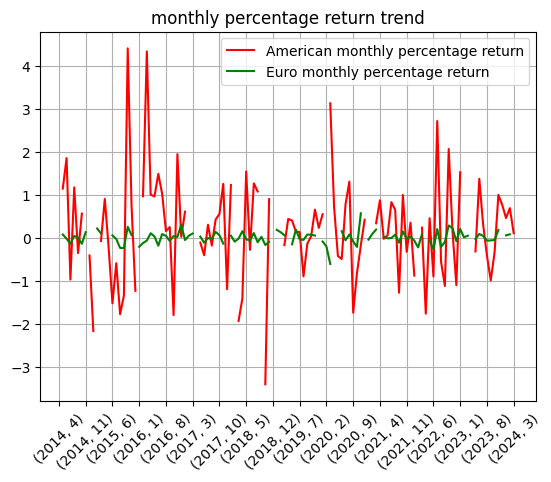

In [31]:
# lets plot the situation of the monthly percentage

# Convert Serries index into string
index_strings_american = [str(index) for index in df_monthly_percentage_return_american.index]
index_strings_euro = [str(index) for index in df_monthly_percentage_return_euro.index]


plt.plot(index_strings_american, df_monthly_percentage_return_american.to_numpy(), label='American monthly percentage return', color='red')
plt.title('monthly percentage return trend')
plt.plot(index_strings_euro, df_monthly_percentage_return_euro.to_numpy(), label='Euro monthly percentage return', color='green')
plt.grid()
# selection of the date indexz to show for readability
plt.xticks(index_strings_american[::7], rotation=45)
plt.legend()

plt.show()

**PAY ATTENTION**<br>
From the priviously plot we can see there are a few gaps in the lines, these gaps are due to the function **calculate_monthly_percentage_return(group)** in the code we have a first condiction which check if the day in the group which represent a month, are less than 20, if we decrease this level we are able to get no Nan value in df_monthly_percentage_return_american and in df_monthly_percentage_return_euro.

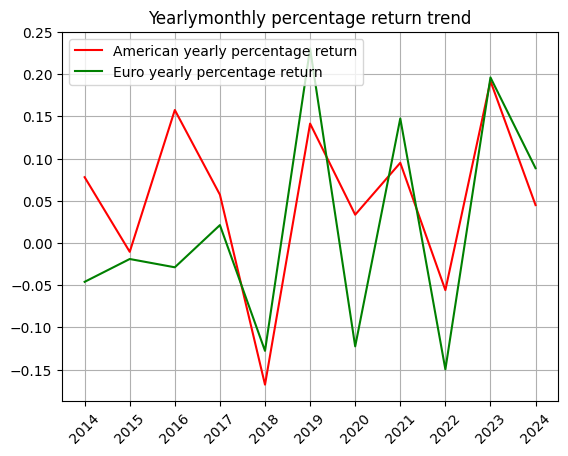

In [32]:
# lets plot the situation of the monthly percentage

# Convert Serries index into string
index_strings_year_american = [str(index) for index in df_yearly_percentage_return_american.index]
index_strings_year_euro = [str(index) for index in df_yearly_percentage_return_euro.index]


plt.plot(index_strings_year_american, df_yearly_percentage_return_american.to_numpy(), label='American yearly percentage return', color='red')
plt.title('Yearlymonthly percentage return trend')
plt.plot(index_strings_year_euro, df_yearly_percentage_return_euro.to_numpy(), label='Euro yearly percentage return', color='green')
plt.grid()
# selection of the date indexz to show for readability
plt.xticks(index_strings_year_american[::], rotation=45)
plt.legend()

plt.show()

### Conclution on trend plot

It's curious to note that both markets have shown the same trend annually since 2017, whereas if we take a more granular view at the level of individual months, we can observe that this similarity in trend is not maintained. Furthermore, we can notice how while the European market remains more stable with small fluctuations, the American one undergoes considerable variations compared to the European ones.

### Apply Second Solution
check above at the start of this section the explanation of second solution.

In [33]:
# workk on EURO market
# Group by 20 obselyrvation for month return
monthly_returns_euro = df_euro.groupby(df_euro.index // 20).apply(calculate_monthly_percentage_return)

#Group by 252 observation for annual return
yearly_returns_euro = df_euro.groupby(df_euro.index // 252)['Daily return'].apply(calculate_annual_percentage_return)

print(monthly_returns_euro)
print(yearly_returns_euro)

0      0.011197
1      0.119364
2     -0.114064
3     -0.115587
4      0.177623
         ...   
121    0.060545
122    0.063802
123    0.074681
124    0.073941
125         NaN
Length: 126, dtype: float64
0    0.106899
1   -0.214276
2    0.069177
3    0.017812
4   -0.006588
5   -0.215783
6    0.298791
7   -0.090914
8    0.105441
9    0.153885
Name: Daily return, dtype: float64


In [34]:
# work on AMERICAN market
# Group by 20 obselyrvation for month return
monthly_returns_american = df_american.groupby(df_american.index // 20).apply(calculate_monthly_percentage_return)

#Group by 252 observation for annual return
yearly_returns_american = df_american.groupby(df_american.index // 252)['Daily return'].apply(calculate_annual_percentage_return)

print(monthly_returns_american)
print(yearly_returns_american)

0      1.391897
1      1.634343
2      1.393771
3     -1.838492
4      1.238914
         ...   
121    0.684922
122    0.680957
123    0.478886
124    0.269319
125         NaN
Length: 126, dtype: float64
0    0.114379
1    0.028826
2    0.120594
3   -0.040149
4   -0.017884
5    0.124900
6   -0.019490
7    0.015034
8    0.087616
9    0.118642
Name: Daily return, dtype: float64


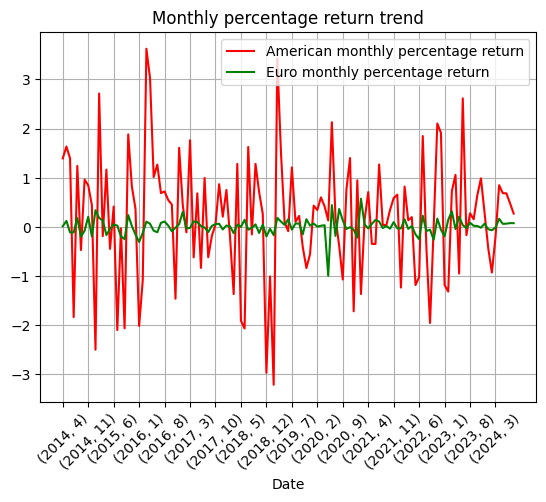

In [35]:
idx_period = index_strings_american
plt.plot(monthly_returns_american.index, monthly_returns_american.to_numpy(), label='American monthly percentage return', color='red')
plt.title('Monthly percentage return trend')
plt.plot(monthly_returns_euro.index, monthly_returns_euro.to_numpy(), label='Euro monthly percentage return', color='green')
plt.grid()
# selection of the date indexto show for readability
plt.xticks(monthly_returns_american.index[::7], idx_period[::7], rotation=45)
plt.xlabel('Date')
plt.legend()

plt.show()

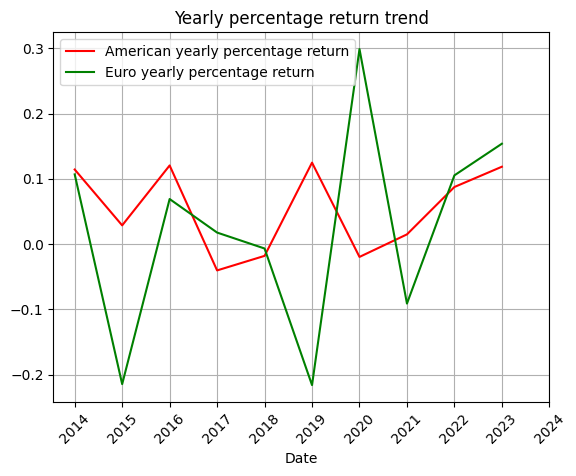

In [36]:
idx_annual = index_strings_year_american

plt.plot(yearly_returns_american.index, yearly_returns_american.to_numpy(), label='American yearly percentage return', color='red')
plt.title('Yearly percentage return trend')
plt.plot(yearly_returns_euro.index, yearly_returns_euro.to_numpy(), label='Euro yearly percentage return', color='green')
plt.grid()
# selection of the date indexz to show for readability
# selection of the date indexto show for readability
plt.xticks(range(0, len(index_strings_year_american)), index_strings_year_american[::], rotation=45)
plt.xlabel('Date')
plt.legend()

plt.show()

## Second point: daily average return
We are goingh to calculate the daily average return for each day of the week in order to see which day will be the best for investment.

In [37]:
from datetime import datetime

def get_weekday_name(date):
    """
    This function is able to map a date given in datetime object and return the name of the day for the date passed.

    Parameter:
    - date(date from datetime): is the date passed fopr knowing the day name.

    Return:
    -  weekdays[date.weekday()](str): the name of the day corrispondent.
    """

    weekdays = ["monday", "tuesday", "wensday", "thursday", "friday", "saturday", "sunday"]
    return weekdays[date.weekday()]


In [38]:
# copy dataframes
new_df_american_date_idx = df_american_date_idx.copy()
new_df_euro_date_idx = df_euro_date_idx.copy()

# create a new dataframe with the day name
new_df_american_date_idx['Day'] = new_df_american_date_idx.index.map(get_weekday_name)
new_df_euro_date_idx['Day'] = new_df_euro_date_idx.index.map(get_weekday_name)

# new_df_american_date_idx
new_df_euro_date_idx

,Open,High,Low,Close,Volume,Daily return,Day
Date,,,,,,,
2014-04-14 22:00:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400,-1.234122,monday
2014-04-15 22:00:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700,0.731601,tuesday
2014-04-16 22:00:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300,0.499661,wensday
2014-04-21 22:00:00,3161.689941,3201.250000,3157.399902,3199.689941,49270000,1.201889,monday
2014-04-22 22:00:00,3197.389893,3198.600098,3175.219971,3175.969971,48916800,-0.669919,tuesday
...,...,...,...,...,...,...,...
2024-04-08 22:00:00,5038.729980,5038.729980,4981.229980,4990.899902,24097700,-0.949249,monday
2024-04-09 22:00:00,5006.500000,5037.180176,4951.189941,5000.830078,28802000,-0.113251,tuesday
2024-04-10 22:00:00,4994.149902,5010.089844,4934.399902,4966.680176,30613200,-0.550038,wensday


In [52]:
def show_histogram_on_daily_return(label, value, title):
  label.sort()
  value.sort()

  colors = plt.cm.viridis(np.linspace(0, 1, len(value)))

  plt.barh(label, value, color=colors)
  plt.xlabel('Average return')
  plt.ylabel('Weekday')
  plt.title(title)
  plt.show()

In [53]:
def get_average_day_return(day, df):
  """
  The function filter the dataframe recieved in order to calculate the average return for the day passed.

  Parameter:
  - day(str): the day for which is wanted the calculation of the average return.
  - df(dataframe pandas): is the dataset containing the information on market.

  Return:
  - average_daily_return(float): the average return for the day wanted.
  """

  filtered_df = df[df['Day'] == day]
  average_daily_return = filtered_df['Daily return'].mean()

  return average_daily_return


In [54]:
working_market_day = ['monday', 'tuesday', 'wensday', 'thursday', 'friday']
average_per_day_america = []

for day in working_market_day:
  average = get_average_day_return(day, new_df_american_date_idx)
  average_per_day_america.append(average)

for i in range(0,len(working_market_day)):
  print(f"The avarege return on {working_market_day[i]+'s'} is {average_per_day_america[i]}")

The avarege return on mondays is 0.059427594115783335
The avarege return on tuesdays is -0.029728022157133313
The avarege return on wensdays is 0.02601822711728848
The avarege return on thursdays is 0.04565087652683297
The avarege return on fridays is 0.018291866794580874


Lets represent the situation with an histogram to give a better idea of the Average return per day, in the plot we will see the day from the best to the worst.

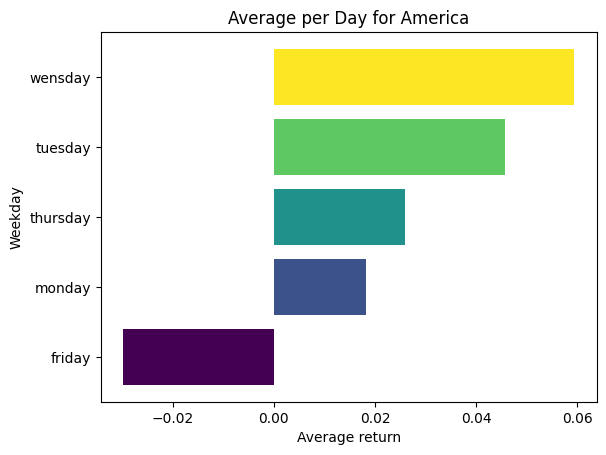

In [55]:
show_histogram_on_daily_return(working_market_day, average_per_day_america, 'Average per Day for America')

**Note**: we can say that the best day for investment in the american stock market is wensday.

In [56]:
average_per_day_euro = []

for day in working_market_day:
  average = get_average_day_return(day, new_df_euro_date_idx)
  average_per_day_euro.append(average)

for i in range(0,len(working_market_day)):
  print(f"The avarege return on {working_market_day[i]+'s'} is {average_per_day_america[i]}")

The avarege return on fridays is -0.029728022157133313
The avarege return on mondays is 0.018291866794580874
The avarege return on thursdays is 0.02601822711728848
The avarege return on tuesdays is 0.04565087652683297
The avarege return on wensdays is 0.059427594115783335


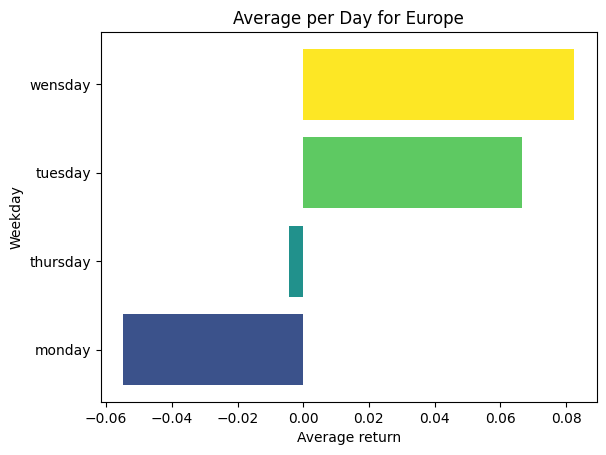

In [57]:
# repeat the same plotting process used before
show_histogram_on_daily_return(working_market_day, average_per_day_euro, 'Average per Day for Europe')

**Note**: In Europe the best day to invest is tuesday.

## Fourth point: Calculate the average daily volume of the two indices.
We will use the statistic function of pandas in order to achive the aim of the section. Just to have a double check on the results we will calculate the average daily volume with the mathematical formula. Anyway this proces for confirmation is just done for practice purpose. Finally the results obtained will be used to make a better renderrization of the information we have.

In [42]:
# the double check code for the average daily volume for european market
# unncomment to see the results
"""
print(df_euro.shape)

total_volume_euro = df_euro['Volume'].sum()
print(total_volume_euro)

mean_volume_euro = total_volume_euro / df_euro.shape[0]
print(f"The double check result for average daily volume european market is {mean_volume_euro:.3f}.")
"""

mean_daily_volume_euro = df_euro['Volume'].mean()
print(f"The average daily volume for the european stock market is {mean_daily_volume_euro:.3f}.")


The average daily volume for the european stock market is 41934439.530.


In [43]:
# the double check code for average daily volume for american market
# unncommment to see the results
"""
print(df_american.shape)

total_volume_american = df_american['Volume'].sum()
print(total_volume_american)

mean_volume_american = total_volume_american / df_american.shape[0]
print(f"The double check result for the average daily volume american market is {mean_volume_american:.3f}.")
"""

mean_daily_volume_american = df_american['Volume'].mean()
print(f"The average daily volume for the american stock market is {mean_daily_volume_american:.3f}.")


The average daily volume for the american stock market is 91289037.894.


#### Plots for better visualization
Lets try some plot to take confidence with the matplotlib. We will try different plot to show the result obtained.

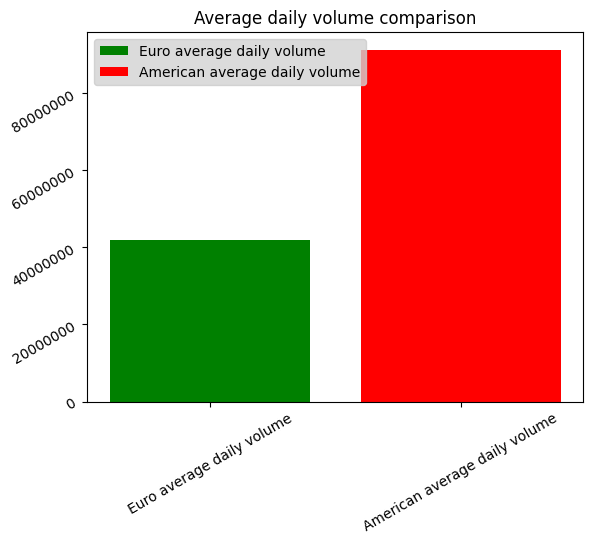

In [44]:
labels_volume = ['Euro average daily volume', 'American average daily volume']
average_markets = [mean_daily_volume_euro, mean_daily_volume_american]
index_volume_plot = np.arange(len(labels_volume))
colors = ['green', 'red']

plt.bar(index_volume_plot, average_markets, label=labels_volume, color=colors)
plt.xticks(index_volume_plot, labels_volume, rotation=30)
plt.ticklabel_format(axis='y', style='plain')
plt.yticks(rotation=30)
plt.legend(loc='upper left', facecolor='lightgray')

plt.title("Average daily volume comparison")
plt.show()

#### Conclution on the average daily volume
Huge difference in the average daily volume generated by the two markets. We can notice the American market has got a daily double volume compared to the European one.